In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("../../new/datasets/balanced.csv", header=None)

In [3]:
# Separamos las características y la variable objetivo
X = df.drop(df.columns[-1], axis=1)
y = df.iloc[:, -1]

In [4]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [6]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))


Epoch 1/100
48/48 [==============================] - 2s 6ms/step - loss: 0.7535 - accuracy: 0.7088 - val_loss: 0.5247 - val_accuracy: 0.8017
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7979 - val_loss: 0.4441 - val_accuracy: 0.8317
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.8204 - val_loss: 0.3980 - val_accuracy: 0.8600
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8500 - val_loss: 0.3687 - val_accuracy: 0.8717
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8637 - val_loss: 0.3397 - val_accuracy: 0.8817
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8842 - val_loss: 0.3089 - val_accuracy: 0.8850
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8863 - val_loss: 0.2722 - val_accuracy: 0.8983
Epoch 8/100
4

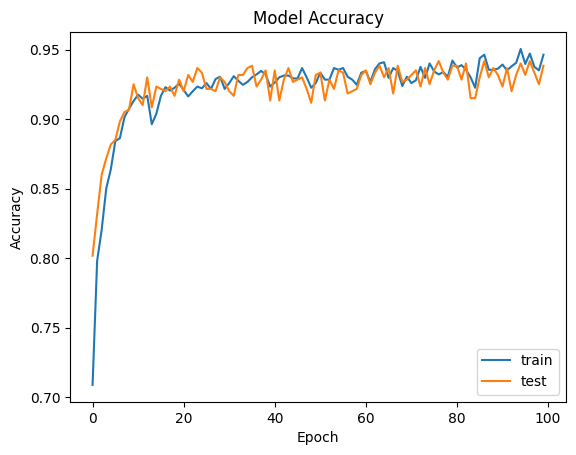

In [8]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 2ms/step
[[193   5   2]
 [  5 174  21]
 [  1   3 196]]


In [10]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred)

array([[[394,   6],
        [  7, 193]],

       [[392,   8],
        [ 26, 174]],

       [[377,  23],
        [  4, 196]]], dtype=int64)

In [11]:
report = classification_report(y_test, y_pred, digits=6)
print(report)

              precision    recall  f1-score   support

           0   0.969849  0.965000  0.967419       200
           1   0.956044  0.870000  0.910995       200
           2   0.894977  0.980000  0.935561       200

    accuracy                       0.938333       600
   macro avg   0.940290  0.938333  0.937991       600
weighted avg   0.940290  0.938333  0.937991       600



In [12]:
# Calcula la especificidad para cada clase
specificities = []
for i in range(3):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Calcula la especificidad promedio
specificity_avg = np.mean(specificities)

In [13]:
specificity_avg

0.9691666666666666

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9383333333333334


In [15]:
from sklearn.metrics import recall_score, f1_score, precision_score

recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('f1-score:', f1)

Recall: 0.9383333333333334
f1-score: 0.9379913899841216


In [16]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9402901237416278, 0.9383333333333334, 0.9379913899841216, None)

In [17]:
from sklearn.metrics import cohen_kappa_score

print("Cohen's kappa: ", cohen_kappa_score(y_test, y_pred))

Cohen's kappa:  0.9075


In [18]:
print("size of the splits")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.size)
print("y_pred: ", y_pred.size)

size of the splits
X_train:  (2400, 343)
X_test:  (600, 343)
y_test:  600
y_pred:  600


# Save model

In [67]:
# Save the model to a single file
model.save( './rna_balance.keras', save_format='keras_v3')

# Suspected Symbiotic Stars v1

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v1/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 18ms/step
[[14  0  1]
 [ 0  0  0]
 [ 0  0  0]]


In [30]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v1/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,4687286621186701568,0.9990,0.0008,0.0001,0
1,4651824725526390016,0.9098,0.0877,0.0025,0
2,3321366590173335424,0.9483,0.0410,0.0106,0
3,5410876219867043072,0.9999,0.0001,0.0000,0
4,3575939163051304192,0.9638,0.0333,0.0029,0


In [31]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v1/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,RAW 1691,LIN 521,C*,C,Gaia DR2 4687286621186701568,RAW 1691|LIN 521|2MASS J01183570-7242213|OGLE ...,C*|Em*|LP*|LP*|Em*|MIR|NIR|*|C*?|LP?,4687286621186701568
1,[BE74] 583,[BE74] 583,LongPeriodV*,G/Ke:,Gaia DR2 4651824725526390016,2MASS J05265014-7106350|EROS2-star lm058-2n-25...,LP*|Em*|NIR|V*|*,4651824725526390016
2,StHA 55,EM* StHA 55,Mira,NaN,Gaia DR3 3321366590173335424,IRAS 05440+0642|ASAS J054642+0643.7|ASAS J0546...,Mi*|LP*|V*|LP*|SB*|LP*|MIR|V*|Em*|NIR|*|C*?|IR...,3321366590173335424
3,ZZ CMi,V* ZZ CMi,LongPeriodV*,M6I-IIep,Gaia DR3 3155368612444708096,BD+09 1633|AN 306.1934|DO 2156|GCRV 4915|G...,LP*|NIR|V*|*|IR|LP?,3155368612444708096
4,WRAY 16−51,WRAY 16-51,LongPeriodV*,M4,Gaia DR2 5410876219860836224,IRAS 09316-4621|AKARI-IRC-V1 J0933295-463450|D...,LP*|NIR|MIR|Em*|PN|*|IR,5410876219867043072


In [32]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,RAW 1691,LIN 521,4687286621186701568,0.9990,0.0008,0.0001,0
1,[BE74] 583,[BE74] 583,4651824725526390016,0.9098,0.0877,0.0025,0
2,StHA 55,EM* StHA 55,3321366590173335424,0.9483,0.0410,0.0106,0
3,WRAY 16−51,WRAY 16-51,5410876219867043072,0.9999,0.0001,0.0000,0
4,NSV 05572,V* VX Crv,3575939163051304192,0.9638,0.0333,0.0029,0


In [33]:
out_name = 'rna_balanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v1/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)

# Suspected Symbiotic Stars v2

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v2/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 23ms/step
[[13  1  3]
 [ 0  0  0]
 [ 0  0  0]]


In [35]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v2/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,6204217186929931520,0.9987,0.0013,0.0000,0
1,4061952680197028224,0.9085,0.0881,0.0034,0
2,670455944074475008,0.3494,0.0075,0.6431,2
3,4068755633500598272,0.0110,0.0548,0.9343,2
4,2060829659152816768,0.0179,0.8098,0.1724,1


In [36]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v2/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,V748 Cen,V* V748 Cen,EclBin,Ae,Gaia DR3 6204217186929931520,CD-32 10517|ALS 18924|CRTS J145936.6-332503|CS...,EB*|Ro*|NIR|V*|Em*|*,6204217186929931520
1,WRAY 16-294,WRAY 16-294,LongPeriodV*,K5,Gaia DR2 4061952680197028224,2MASS J17391381-2538050|DENIS J173913.8-253805...,LP*|PN|NIR|Em*|*|C*?|ISM|LP?,4061952680197028224
2,DASCH J075731.1+201735,ASAS J075731+2017.6,LongPeriodV*,M0III,Gaia DR2 670455944074475008,2MASS J07573112+2017347|ASAS J075731+2017.6|DA...,SB*|LP*|NIR|V*|*|Opt,670455944074475008
3,ASAS J174600-2321.3,ASAS J174600-2321.3,LongPeriodV*_Candidate,F0I,Gaia DR2 4068755633500598272,2MASS J17460018-2321163|ASAS J174600-2321.3|ER...,NIR|V*|*|LP?,4068755633500598272
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,PlanetaryNeb_Candidate,NaN,Gaia DR2 2060829659152816768,2MASS J20155096+3730042|AKARI-IRC-V1 J2015509+...,NIR|*|C*?|IR|LP?|PN?,2060829659152816768


In [37]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,V748 Cen,V* V748 Cen,6204217186929931520,0.9987,0.0013,0.0000,0
1,WRAY 16-294,WRAY 16-294,4061952680197028224,0.9085,0.0881,0.0034,0
2,DASCH J075731.1+201735,ASAS J075731+2017.6,670455944074475008,0.3494,0.0075,0.6431,2
3,ASAS J174600-2321.3,ASAS J174600-2321.3,4068755633500598272,0.0110,0.0548,0.9343,2
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,2060829659152816768,0.0179,0.8098,0.1724,1


In [38]:
out_name = 'rna_balanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v2/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)